# Advanced Hydrology

Assignment One

August 28, 2023

Brandon Whittle

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt

%load_ext lab_black

# Problem One

Solve the problem 2-23 (page 58) in the textbook. Please use any programming
languages of your choice (e.g., Matlab, R, or Python) to draw the histogram and include
the source codes in your answer. [15 points]

(2-23) Construct a histogram of the river stage data of Table 2.3 using a 0.5-m interval. Compare the shape of the histogram of Figure 2.21. Discuss any differences noted.

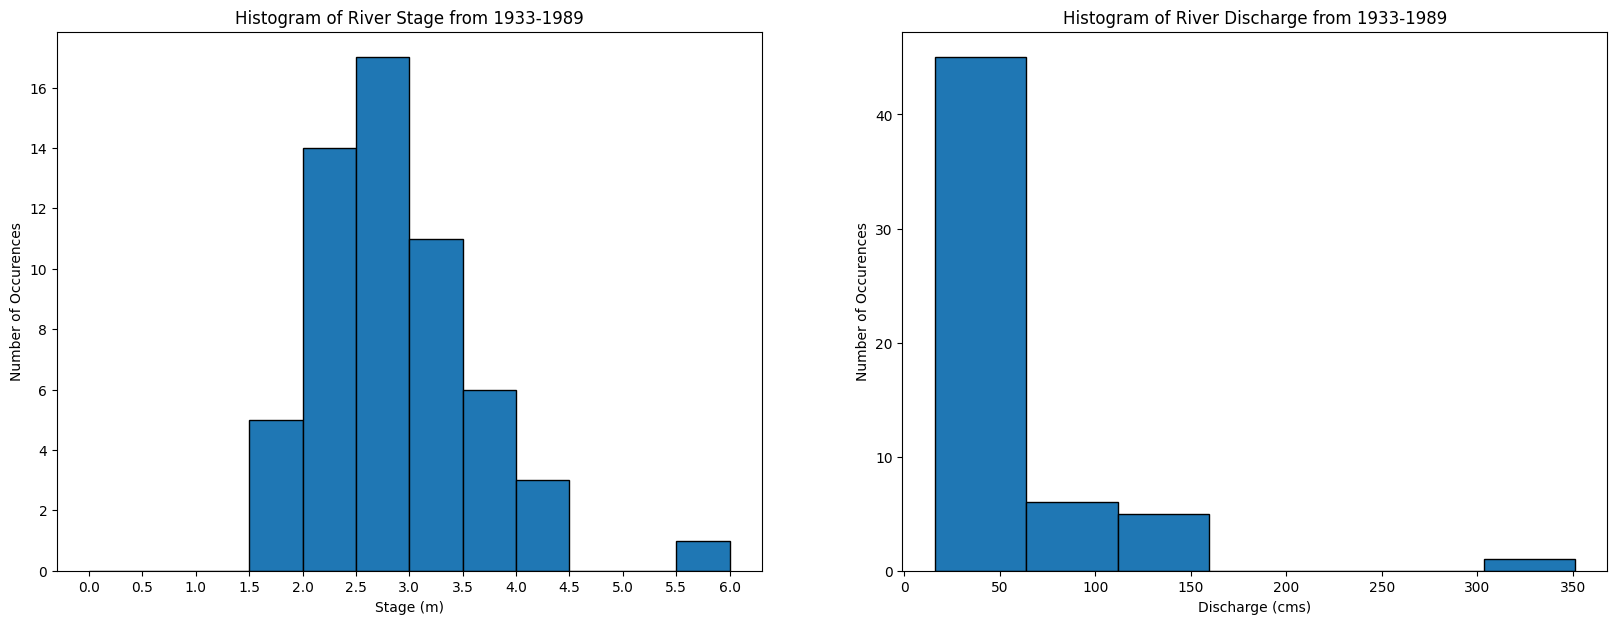

In [2]:
# Get data from CSV into pandas dataframe
data_01 = pd.read_csv("P01_data.csv", delimiter=",")

# Define special bins list
bins = np.arange(0, 6.5, 0.5)

# Make histogram
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].hist(data_01["stage"], bins=bins, edgecolor="k")
ax[0].set(
    title="Histogram of River Stage from 1933-1989",
    xlabel="Stage (m)",
    ylabel="Number of Occurences",
    xticks=bins,
)


# Make histogram of discharge for fun
# Use equation to determine number of bins based on n
def bin_number(n):
    return round(1 + 3.3 * np.log10(n), 0)


discharge_number_bins = bin_number(len(data_01["discharge"]))
minimum = np.min(data_01["discharge"])
maximum = np.max(data_01["discharge"])
increment = (maximum - minimum) / discharge_number_bins
bins_1 = np.arange(minimum, maximum + increment, increment)
ax[1].hist(data_01["discharge"], bins=bins_1, edgecolor="k")
ax[1].set(
    title="Histogram of River Discharge from 1933-1989",
    xlabel="Discharge (cms)",
    ylabel="Number of Occurences",
)

plt.show()

When compared to Figure 2.21 shown in the book on page 50, this histogram with 0.5m intervals shows the an increased resolution of the "curve" created by the data. This allows for an extra step on the increase of the "curve", as well as more definition of the decrease on the right side. The "curve" I am suggesting the data follows is roughly a left-skew normal distribution.

# Problem Two

Go to https://waterdata.usgs.gov/mo/nwis/rt and download daily streamflow data for
2019 at a location of your interest. Draw the “duration curve” and indicate the discharge
amounts corresponding to 90% and 10% of exceedance probability (use linear
interpolation, if necessary). Please use a programming language and include the source
codes in your answer. [20 points]

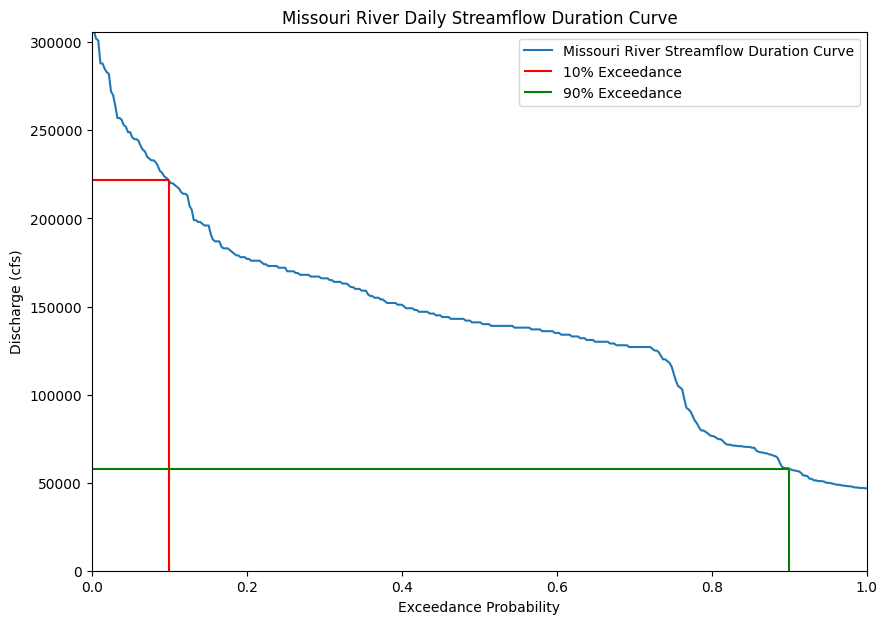

10% Exceedance Probability (linreg): 222000 cfs
90% Exceedance Probability (linreg): 57900 cfs


In [29]:
# Import data gathered from USGS (data has been cleaned)
# https://waterdata.usgs.gov/nwis/dv?cb_00060=on&cb_00065=on&cb_80297=on&cb_99409=on&format=rdb&site_no=06893000&legacy=&referred_module=sw&period=&begin_date=2019-01-01&end_date=2019-12-31
mo_river_daily_streamflow = pd.read_csv("mo_river.tsv", sep="\t")
# Sort data from largest to smallest
mo_river_daily_streamflow_sorted = sorted(
    mo_river_daily_streamflow["75376_00060_00003"], reverse=True
)
# Generate percentages for each day of 365 days
percents = [x / 365 for x in range(1, 366)]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(
    percents,
    mo_river_daily_streamflow_sorted,
    label="Missouri River Streamflow Duration Curve",
)
ax.vlines(x=0.1, ymin=0, ymax=222000, color="r", label="10% Exceedance")
ax.vlines(x=0.9, ymin=0, ymax=57000, color="g", label="90% Exceedance")
ax.hlines(y=222000, xmin=0.0, xmax=0.1, color="r")
ax.hlines(y=57900, xmin=0.0, xmax=0.9, color="g")
ax.set(
    title="Missouri River Daily Streamflow Duration Curve",
    xlabel="Exceedance Probability",
    ylabel="Discharge (cfs)",
    xlim=(0, 1),
    ylim=(0, mo_river_daily_streamflow_sorted[0]),
)
plt.legend()
plt.show()

# Calculated by looking through sorted data and manual linear interpolation
# Temporary code to do this has been removed
print(f"10% Exceedance Probability (linreg): 222000 cfs")
print(f"90% Exceedance Probability (linreg): 57900 cfs")

# Problem Three

Solve the problem 2-34 (page 59) in the textbook. Please also calculate the coefficient of
skewness and draw a histogram and a box-and-whisker plot. Discuss its skewness
(positive or negative) with the locations of relevant statistics (i.e., mean, median, and
mode). Please use a programming language and include the source codes in your
answer. [15 points]

(2-34) For the data of Problem 2.26, determine the central tendency measures: the average value, median, and mode.

(2-26) The following concrete strength data (in ksi) were collected using an ultrasonic nondestructive testing method at different locations of an existing structure: 3.5, 3.2, 3.1, 3.5, 3.6, 3.2, 3.4, 2.9, 4.1, 2.6, 3.3, 3.5, 3.9, 3.8, 3.7, 3.4, 3.6, 3.5, 3.5, 3.7, 3.6, 3.8, 3.2, 3.4, 4.2, 3.6, 3.1, 2.9, 2.5, 3.5, 3.4, 3.2, 3.7, 3.8, 3.4, 3.6, 3.5, 3.2, 3.6, and 3.8. Plot the histogram and relative frequency diagrams for concrete

std: 0.3522819383711917
Mean: 3.45
Median: 3.5
Mode: 3.5, Count: 7
Skew: -0.54


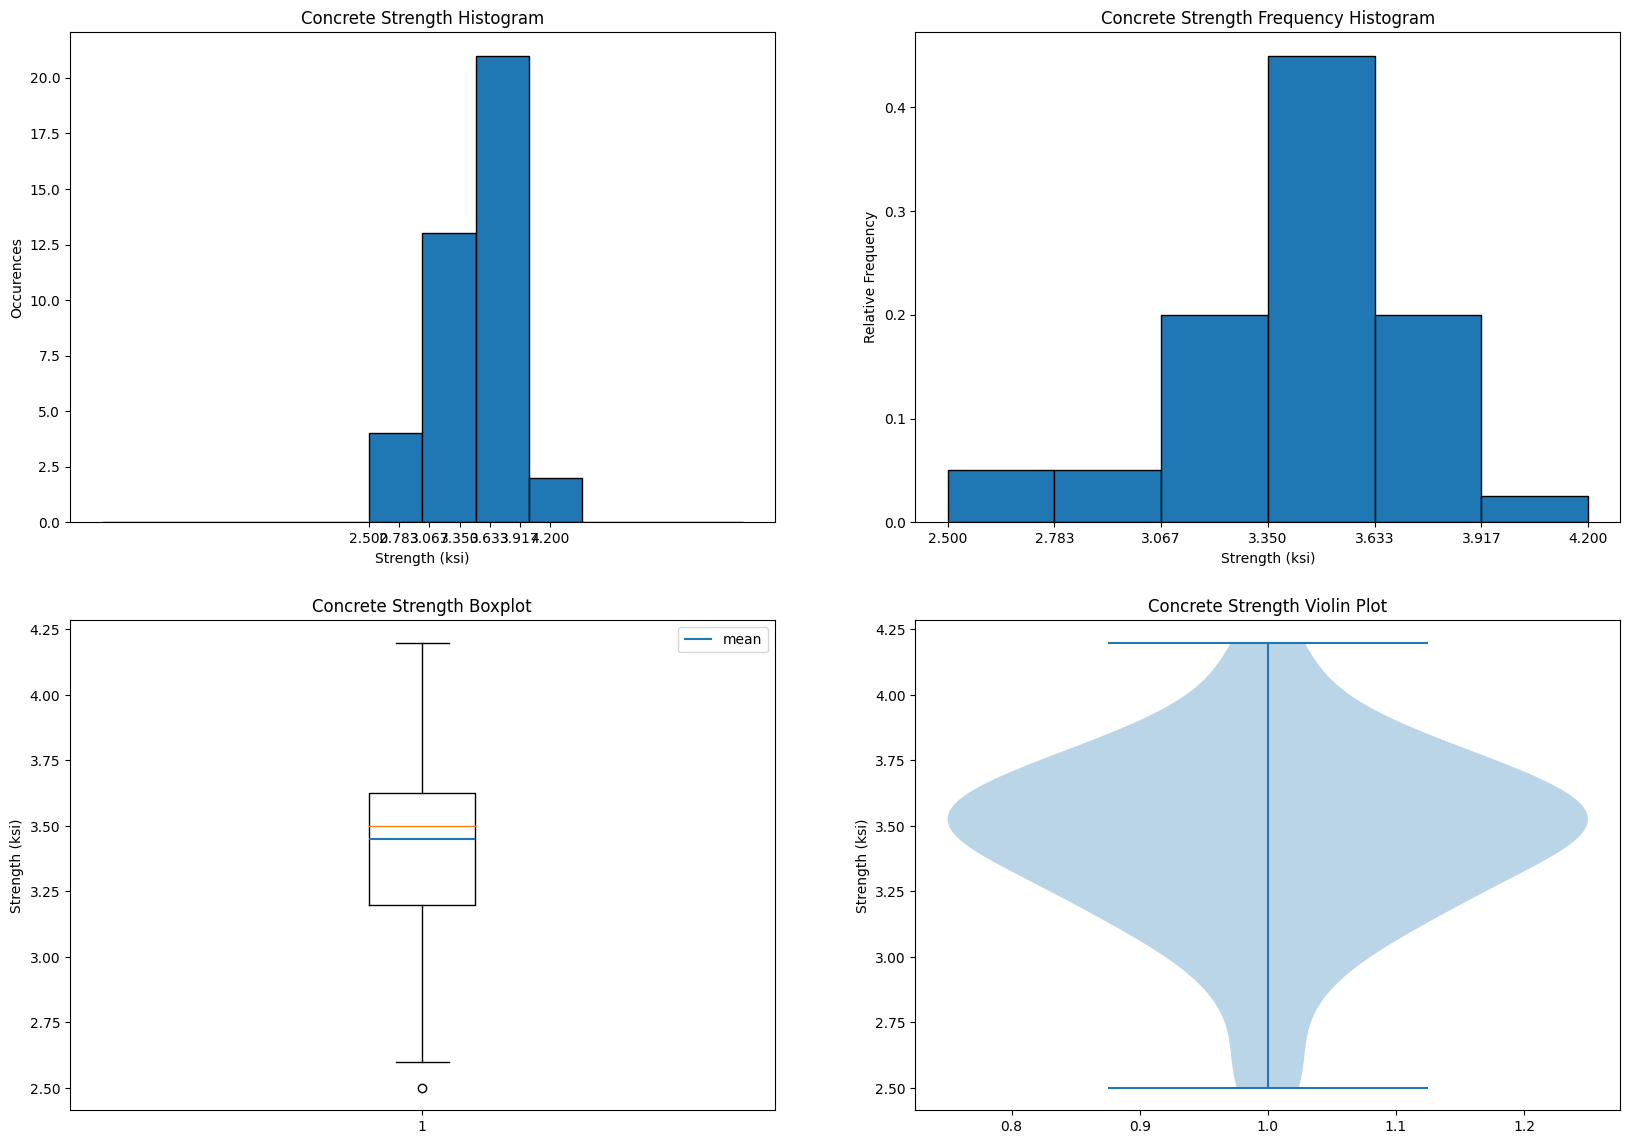

In [ ]:
# Import data from csv file
data_03 = pd.read_csv("p03.csv")


def standard_deviation_unbiased(values, mean):
    temp_sum = 0
    for v in values:
        temp_sum += np.power(v - mean, 2)
    return np.sqrt(1 / (len(values) - 1) * temp_sum)


def skewness(values, mean):
    temp_sum = 0
    for v in values:
        temp_sum += np.power(v - mean, 3)
    return temp_sum / (
        len(values) * np.power(standard_deviation_unbiased(values, mean), 3)
    )


mean = np.mean(data_03["values"])
median = np.median(data_03["values"])
mode = stats.mode(data_03["values"])
skew = skewness(sorted(data_03["values"]), mean)
minimum = data_03["values"].min()
maximum = data_03["values"].max()

number_of_bins = bin_number(len(data_03["values"]))
increment = (maximum - minimum) / number_of_bins
concrete_strength_hist_bins = np.arange(minimum, maximum + increment, increment)

# Draw histogram
fig, ax = plt.subplots(2, 2, figsize=(20, 14))
ax[0][0].hist(data_03["values"], bins=bins, edgecolor="k")
ax[0][0].set(
    title="Concrete Strength Histogram",
    xlabel="Strength (ksi)",
    ylabel="Occurences",
    xticks=concrete_strength_hist_bins,
)

# Draw relative frequency diagram
ax[0][1].hist(
    data_03["values"],
    edgecolor="k",
    bins=concrete_strength_hist_bins,
    weights=np.ones_like(data_03["values"]) / len(data_03["values"]),
)
ax[0][1].set(
    title="Concrete Strength Frequency Histogram",
    xlabel="Strength (ksi)",
    ylabel="Relative Frequency",
    xticks=concrete_strength_hist_bins,
)

# Draw boxplot
# Please note python/matplotlib does not draw the mean, only median.
# Mean is noted by blue line added to box plot. Median is in red
box_data = ax[1][0].boxplot(data_03["values"])
ax[1][0].set(
    title="Concrete Strength Boxplot",
    ylabel="Strength (ksi)",
)
ax[1][0].hlines(mean, 0.925, 1.075, label="mean")

# Violin plot because I have an extra axis anyway
ax[1][1].violinplot(data_03["values"])
ax[1][1].set(
    title="Concrete Strength Violin Plot",
    ylabel="Strength (ksi)",
)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode[0]}, Count: {mode[1]}")
print(f"Skew: {skew:.2f}")

ax[1][0].legend()
plt.show()

The central tendencies of the dataset are listed above the plots, as well as the skewness. We note that the skewness is negative, a calculation that is supported by the data tailing off to the left in our histogram. This suggests that the mean < median < mode. In our data, we note that the mean is indeed less than the median, but that the median and the mode are equal.This is due to a relatively high repetition of the mode value across the middle area of our sorted dataset.  

# Problem Four

Solve the problem 3-8 (page 108). [10 points]

(3-8) The scores on a test were distributed as shown below for a class of 60 students. Convert the frequency histogram to a probability distribution. What is the probability that a student had a score of at least 90? What is the probability that a student failed the test (F grade), assuming that a score less than 70 was considered an F?

Mean: 77.79166666666667
Median: 77.0
Mode: 82.0, Count: 13
Skew: -0.35
Standard Deviation: 11.00
Probability of student scoring an A: 0.11
Probability of student scoring an F: 0.24


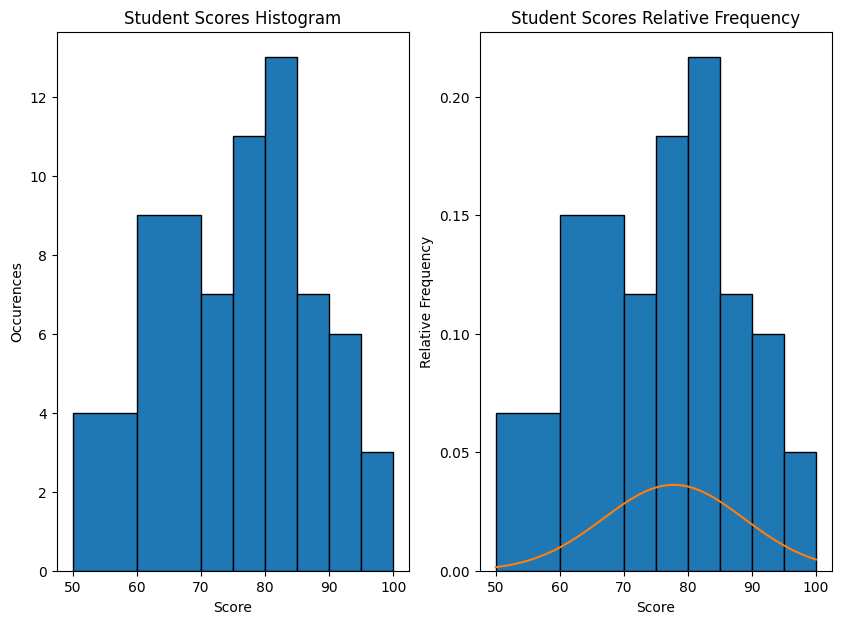

In [ ]:
# Create list of approximate scores based on bin averages and counts
guesstimate_scores = (
    [54.5] * 4
    + [64.5] * 9
    + [72] * 7
    + [77] * 11
    + [82] * 13
    + [87] * 7
    + [92] * 6
    + [97] * 3
)

data_04 = pd.DataFrame(
    data={
        "scores": guesstimate_scores,
    }
)

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].hist(
    data_04["scores"],
    bins=[50, 60, 70, 75, 80, 85, 90, 95, 100],
    edgecolor="k",
)
ax[0].set(title="Student Scores Histogram", xlabel="Score", ylabel="Occurences")

# Plot frequency diagram
ax[1].hist(
    data_04["scores"],
    weights=np.ones_like(data_04["scores"]) / len(data_04["scores"]),
    bins=[50, 60, 70, 75, 80, 85, 90, 95, 100],
    edgecolor="k",
)
ax[1].set(
    title="Student Scores Relative Frequency",
    xlabel="Score",
    ylabel="Relative Frequency",
)

# Get central tendencies
mean = np.mean(data_04["scores"])
median = np.median(data_04["scores"])
mode = stats.mode(data_04["scores"])
skew = skewness(data_04["scores"], mean)
stdd = stats.tstd(data_04["scores"])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode[0]}, Count: {mode[1]}")
print(f"Skew: {skew:.2f}")
print(f"Standard Deviation: {stdd:.2f}")


# Pearsons median skewness within about 0.4 is negligible
# https://www.scribbr.com/statistics/skewness/
def pearsons_skewness(mean, median, stdd):
    return 3 * ((mean - median) / stdd)


# print(pearsons_skewness(mean, median, stdd))
# 0.216 is within 0.4, negligible skew, use normal distribution for now


# Define normal distribution
def normal_distribution(x, stdd, mean):
    return (
        1 / (stdd * np.sqrt(np.pi * 2)) * np.exp(-0.5 * np.power((x - mean) / stdd, 2))
    )


# Generate x values and plot
p4_x = np.linspace(50, 100, 100)
ax[1].plot(p4_x, normal_distribution(p4_x, stdd, mean))

a_prob = integrate.quad(lambda x: normal_distribution(x, stdd, mean), 90, 100)[0]
f_prob = integrate.quad(lambda x: normal_distribution(x, stdd, mean), 0, 70)[0]

print(f"Probability of student scoring an A: {a_prob:.2f}")
print(f"Probability of student scoring an F: {f_prob:.2f}")

plt.show()

As seen in the above calculations, the probability of a student scoring an A or F are about 0.11 and 0.24, respectively. These values are incorrect due to the pdf of the normal distribution, which will have some area along the scores under 0, and above 100, but the values are certainly close considering the odd fitment with the slight skew. Increasing the bounds for an A from 90% to 300% yields 0.13, which is marginally more than our estimated 0.11. (I have removed this calculation from the code, but I performed it before typing this explanation)

# Problem Five

Solve the problem 3-14 (page 108). [10 points]

(3-14) Two loads A and B are applied on a structural column and are mutually exclusive. The probability that the beam is safe against load A is 0.7 and against load B is 0.9. What is the probability that the structure is safe, assuming that the “safe” events for the two loads are independent?

Because the probabilities are statistically independent, the following holds:
Pr[A|B] = Pr[A]
Pr[B|A] = Pr[B]

Thus, Pr[AB] = Pr[A] * Pr[B] = 0.7 * 0.9 = 0.63

# Problem Six

Solve the problem 3-16 (page 109). [10 points]

(3-16) A concrete beam may fail by shear or flexure. The failure probability in shear is equal to failure probability in flexure, and the probability of failure in shear when the beam is loaded beyond its flexural capacity (i.e., the beam already failed in flexure) is 80%. Find the failure probability of the beam in flexure, knowing that the probability of failure of the beam is 0.2.

Given:

- Pr[Shear|Flexure] = 0.8
- Pr[Failure] = 0.2
- Pr[Shear] = Pr[Flexure]

We know that: 

$$
\begin{align}
    Pr[Shear|Flexure] &= \frac{Pr[Shear \cap Flexure]}{Pr[Flexure]}  \nonumber\\
    Pr[Failure] &= Pr[Shear \cup Flexure] \nonumber
\end{align}
$$

Letting A and B represent the probabilities of failure by shear and flexure, respectively, and noting that A=B, we get the following:

$$
\begin{align}
    Pr[Failure] &= Pr[Shear \cup Flexure]  \nonumber\\
                &= A + A - Pr[Shear|Flexure] * A  \nonumber\\
    0.2         &= 1.2A  \nonumber\\
    A           &\approx \boxed{0.17} \nonumber
\end{align}
$$

We can verify these estimations by working out the rest of the probabilities and checking:

$$
\begin{align}
    Pr[Shear|Flexure] &= \frac{Pr[Shear \cap Flexure]}{Pr[Flexure]}  \nonumber\\
    0.8 &= \frac{Pr[Shear \cap Flexure]}{0.17}  \nonumber\\
    Pr[Shear \cap Flexure] &= 0.8 \cdot 0.17 \approx 0.14 \nonumber
\end{align}
$$

and then

$$
\begin{align}
    Pr[Failure] = Pr[Shear \cup Flexure] &= Pr[Shear] + Pr[Flexure] - Pr[Shear \cup Flexure] \nonumber\\
    0.2 &= 0.17 + 0.17 - 0.14 = 0.2
\end{align}
$$

ANSWER FOUND: Pr[Flexure] = 0.17

# Problem Seven

Solve the problem 3-23 (page 109-110). [10 points]

(3-23) A shipping company facilitates for customers the transfer of any items from any location to another within the United States. The company transfers 20, 50, and 30% of the items by air, ground, and sea transportation, respectively. The breakdown of these items by shipping method is shown in the accompanying figure. Assume that 5% of the items shipped by air get damaged during shipping, 10% of the items shipped by ground get damaged during shipping, and 15% of the items shipped by sea get damaged during shipping. Determine the following probabilities:

a. The probability of receiving a damaged item sent by air, ground, or sea 

b. If an item was received damaged, the probability that it was sent by (i) air, (ii) by ground, and (iii) by sea


Given:

$$
\begin{align}
    Pr[A] &= 0.2 \nonumber \\
    Pr[G] &= 0.5 \nonumber \\
    Pr[S] &= 0.3 \nonumber \\
    Pr[D|A] &= 0.05 \nonumber \\
    Pr[D|G] &= 0.1 \nonumber \\
    Pr[D|S] &= 0.15 \nonumber \\
\end{align}
$$

a) The probability of receiving a damaged product from any of the lines will be the sum of the joint probabilities, as the events are not independent (Example 3.22). We calculate this as follows:

$$
\begin{align}
    Pr[D \cap A] &= Pr[D|A] \cdot Pr[A] \nonumber \\
                 &= 0.05 \cdot 0.2 \nonumber \\
                 &= 0.01 \nonumber \\
    Pr[D \cap G] &= Pr[D|G] \cdot Pr[G] \nonumber \\
                 &= 0.1 \cdot 0.5 \nonumber \\
                 &= 0.05 \nonumber \\
    Pr[D \cap S] &= Pr[D|S] \cdot Pr[S] \nonumber \\
                 &= 0.15 \cdot 0.3 \nonumber \\
                 &= 0.045 \nonumber \\
    Pr[D] &= Pr[D \cap A] + Pr[D \cap G] + Pr[D \cap S] \nonumber \\
          &= 0.01 + 0.05 + 0.045 \nonumber \\
          &= \boxed{0.105} \nonumber \\
\end{align}
$$

b) To calculate the probability of a damaged item coming from a specific line, we calculate the following using Bayes' theorem:

$$
\begin{align}
    Pr[A|D] &= \frac{Pr[D|A] \cdot Pr[A]}{Pr[D]} \nonumber \\
            &= \frac{0.1}{0.105} \nonumber \\
            &= \boxed{0.095} \nonumber \\
    Pr[G|D] &= \frac{Pr[D|G] \cdot Pr[G]}{Pr[D]} \nonumber \\
            &= \frac{0.05}{0.105} \nonumber \\
            &= \boxed{0.476} \nonumber \\
    Pr[S|D] &= \frac{Pr[D|S] \cdot Pr[S]}{Pr[D]} \nonumber \\
            &= \frac{0.045}{0.105} \nonumber \\
            &= \boxed{0.429} \nonumber \\
\end{align}
$$

ANSWERS: 0.105, 0.095, 0.476, 0.429

# Problem Eight

Solve the problem 3-25 (page 110). [10 points]

(3-25) A construction site receives fill material from three sources, with sources A , B , and C providing 15, 25, and 60% of the total, respectively. On the average, fill material from sources A , B , and C do not have the proper moisture characteristics 2, 6, and 3% of the time, respectively. If one dump truck is sampled at random and the fill material does not have the proper moisture, what is the probability that it came (a) from source A , (b) from source B , and (c) from source C ?

Given:

$$
\begin{align}
    Pr[A] &= 0.15 \nonumber \\
    Pr[B] &= 0.25 \nonumber \\
    Pr[C] &= 0.6 \nonumber \\
    Pr[D|A] &= 0.02 \nonumber \\
    Pr[D|B] &= 0.06 \nonumber \\
    Pr[D|C] &= 0.03 \nonumber \\
\end{align}
$$

This problem works out the same as the previous: We will first determine the overall probability of the fill having an improper moisture content (D=dry), and then use Bayes' theorem to work out Pr[A|D], Pr[B|D], and Pr[C|D].

$$
\begin{align}
    Pr[D] &= Pr[D|A] \cdot Pr[A] + Pr[D|B] \cdot Pr[B] + Pr[D|C] \cdot Pr[C] \nonumber \\
          &= 0.02 \cdot 0.15 + 0.06 \cdot 0.25 + 0.03 \cdot 0.6 \nonumber \\
          &= 0.036 \nonumber \\
\end{align}
$$

Now we can figure out the probability that fill with improper moisture levels came from each source:

$$
\begin{align}
    Pr[A|D] &= \frac{Pr[D|A] \cdot Pr[A]}{Pr[D]} \nonumber \\
            &= \frac{0.02 \cdot 0.15}{0.036} \nonumber \\
            &= \boxed{0.083}  \nonumber \\
    Pr[B|D] &= \frac{Pr[D|B] \cdot Pr[B]}{Pr[D]} \nonumber \\
            &= \frac{0.06 \cdot 0.25}{0.036} \nonumber \\
            &= \boxed{0.417}  \nonumber \\
    Pr[C|D] &= \frac{Pr[D|C] \cdot Pr[C]}{Pr[D]} \nonumber \\
            &= \frac{0.03 \cdot 0.6}{0.036} \nonumber \\
            &= \boxed{0.5}  \nonumber \\
\end{align}
$$

ANSWERS: 0.083, 0.417, 0.5
